In [1]:
# import rdkit components
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# use IPythonConsole for pretty drawings
from rdkit.Chem.Draw import IPythonConsole
# IPythonConsole.ipython_useSVG=True  # leave out for github

# for flattening
from itertools import chain

FAILED!


RDKit ERROR: [18:04:58] Can't kekulize mol.  Unkekulized atoms: 3
RDKit ERROR: 


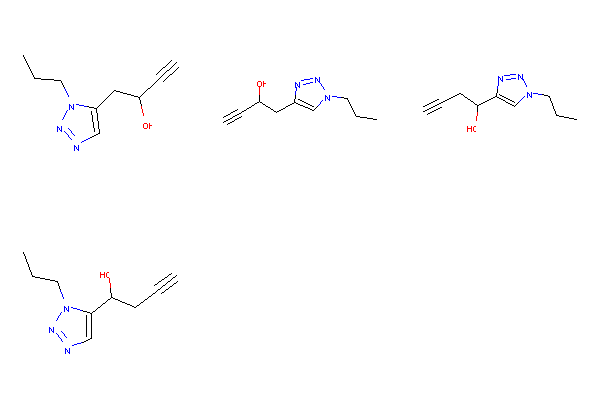

In [2]:
# define reactants
diyne_smiles = 'C#CCC(O)C#C'
azide_smiles = 'CCCN=[N+]=[N-]'

diyne = Chem.MolFromSmiles(diyne_smiles)
azide = Chem.MolFromSmiles(azide_smiles)

# define reaction
copper_click_smarts = '[C:1]#[C:2].[N:3]=[N+:4]=[N-:5]>>[c:1]1[c:2][n-0:3][n-0:4][n-0:5]1'
copper_click = AllChem.ReactionFromSmarts(copper_click_smarts)

# run reaction
products_tuples = copper_click.RunReactants((diyne, azide))

# flatten product tuple of tuples into list
products = list(chain(*products_tuples))

# FAILS: mol property caches are not updated
try:
    Draw.MolsToGridImage(products)
except (RuntimeError, ValueError) as e:
    print 'FAILED!'
    my_error = e

# this works: force updating 
for product in products:
    product.UpdatePropertyCache()

Draw.MolsToGridImage(products)

In [3]:
my_error

ValueError("Sanitization error: Can't kekulize mol.  Unkekulized atoms: 3\n")

In [4]:
products_tuples = copper_click.RunReactants((diyne, azide))
products = list(chain(*products_tuples))
# FAILS: mol property caches are not updated
Draw.MolsToGridImage(products)

RDKit ERROR: [18:07:30] Can't kekulize mol.  Unkekulized atoms: 3
RDKit ERROR: 


ValueError: Sanitization error: Can't kekulize mol.  Unkekulized atoms: 3
